In [ ]:

import numpy as np 
import pandas as pd 
import os
import warnings

warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns

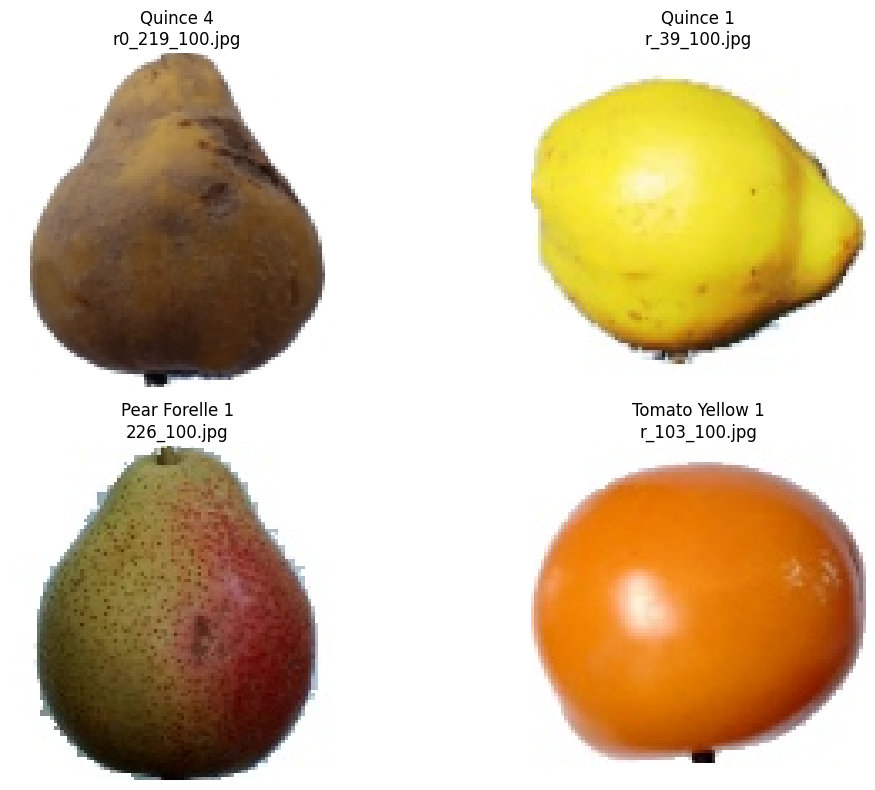

In [ ]:
# 📦 Import libraries
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# 📁 Step 2: Define Paths
TEST_DIR = "C:/Users/nandi/OneDrive/Desktop/CV-Fruit-Classification-Project/Test"  # Update this path to your local test folder

# 🍓 Select random fruit classes
fruit_classes = [f for f in os.listdir(TEST_DIR) if os.path.isdir(os.path.join(TEST_DIR, f))]
selected_classes = random.sample(fruit_classes, 4)  # Display 4 random classes

# 🎨 Plot random images from each class
plt.figure(figsize=(12, 8))

for i, fruit_class in enumerate(selected_classes):
    class_path = os.path.join(TEST_DIR, fruit_class)
    image_files = [f for f in os.listdir(class_path) if f.endswith(".jpg")]
    selected_image = random.choice(image_files)
    image_path = os.path.join(class_path, selected_image)

    img = Image.open(image_path)
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.title(f"{fruit_class}\n{selected_image}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 🔧 Preprocessing
transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# 📁 Load datasets
train_dataset = datasets.ImageFolder(root="C:/Users/nandi/OneDrive/Desktop/CV-Fruit-Classification-Project/Training", transform=transform)
test_dataset = datasets.ImageFolder(root="C:/Users/nandi/OneDrive/Desktop/CV-Fruit-Classification-Project/Test", transform=transform)

# 🚚 DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 🏷️ Class labels
class_names = train_dataset.classes


In [7]:
class_names

['Apple 10',
 'Apple 11',
 'Apple 12',
 'Apple 13',
 'Apple 14',
 'Apple 17',
 'Apple 18',
 'Apple 19',
 'Apple 5',
 'Apple 6',
 'Apple 7',
 'Apple 8',
 'Apple 9',
 'Apple Braeburn 1',
 'Apple Core 1',
 'Apple Crimson Snow 1',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith 1',
 'Apple Pink Lady 1',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious 1',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apple Rotten 1',
 'Apple hit 1',
 'Apple worm 1',
 'Apricot 1',
 'Avocado 1',
 'Avocado Black 1',
 'Avocado Green 1',
 'Avocado ripe 1',
 'Banana 1',
 'Banana 3',
 'Banana 4',
 'Banana Lady Finger 1',
 'Banana Red 1',
 'Beans 1',
 'Beetroot 1',
 'Blackberrie 1',
 'Blackberrie 2',
 'Blackberrie half rippen 1',
 'Blackberrie not rippen 1',
 'Blueberry 1',
 'Cabbage red 1',
 'Cabbage white 1',
 'Cactus fruit 1',
 'Cactus fruit green 1',
 'Cactus fruit red 1',
 'Caju seed 1',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula 1',
 'Carrot 1',
 'Cauli

In [ ]:
import torch.nn as nn

class FruitClassifier(nn.Module):
    def __init__(self, num_classes):
        super(FruitClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(128, 256, 3, padding=1), nn.BatchNorm2d(256), nn.ReLU(), nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(256 * 12 * 12, 1024), nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(92, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Epoch 1, Loss: 3444.9231
Epoch 2, Loss: 1442.4890
Epoch 3, Loss: 888.4933


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

print(classification_report(all_labels, all_preds, target_names=class_names))

                           precision    recall  f1-score   support

                 Apple 10       1.00      1.00      1.00       231
                 Apple 11       1.00      1.00      1.00       142
                 Apple 12       1.00      1.00      1.00       154
                 Apple 13       1.00      1.00      1.00       235
                 Apple 14       1.00      1.00      1.00       154
                 Apple 17       1.00      1.00      1.00       201
                 Apple 18       1.00      1.00      1.00       160
                 Apple 19       1.00      1.00      1.00       241
                  Apple 5       1.00      1.00      1.00       146
                  Apple 6       0.71      1.00      0.83       157
                  Apple 7       1.00      1.00      1.00       229
                  Apple 8       1.00      1.00      1.00       228
                  Apple 9       1.00      1.00      1.00       231
         Apple Braeburn 1       0.94      0.77      0.85     

In [ ]:

torch.save(model.state_dict(), "fruit_model.pth")